In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [28]:
data_path = r"D:\code_study\my_code\2024.11.29_allToolSets\dataSets\csv\PE_jiaoyin.csv"
data = pd.read_csv(data_path, header=0)
data.head()
data

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S,label
0,28.360215,18.918866,26.644673,145.357771,87.782991,28.898338,145.309873,24.156891,53.220430,5
1,26.931332,18.678399,27.753968,152.304348,87.787440,28.508282,152.265700,23.840580,53.220497,5
2,25.657631,18.368183,28.297193,157.259439,90.607938,28.528558,157.216199,23.689577,55.331075,5
3,24.818455,17.933874,28.464683,159.948302,94.461677,28.509167,159.905020,23.466186,58.225128,5
4,29.976091,18.376270,24.251943,139.512253,101.415421,30.714286,139.469516,24.710998,63.993724,5
...,...,...,...,...,...,...,...,...,...,...
187,30.105223,17.305589,21.565211,130.012523,108.950367,30.130880,129.961668,23.955712,69.612095,8
188,31.195616,17.392449,20.455168,126.686558,113.173238,31.212209,126.660527,24.534023,72.903334,8
189,34.403811,17.814428,18.375529,121.237145,126.086358,34.406534,121.210829,26.115094,83.880672,8
190,58.259576,26.207867,18.857248,114.801856,170.362257,58.288156,114.781379,38.612846,129.493223,8


In [29]:
#dealing with missing data
data = data.dropna()

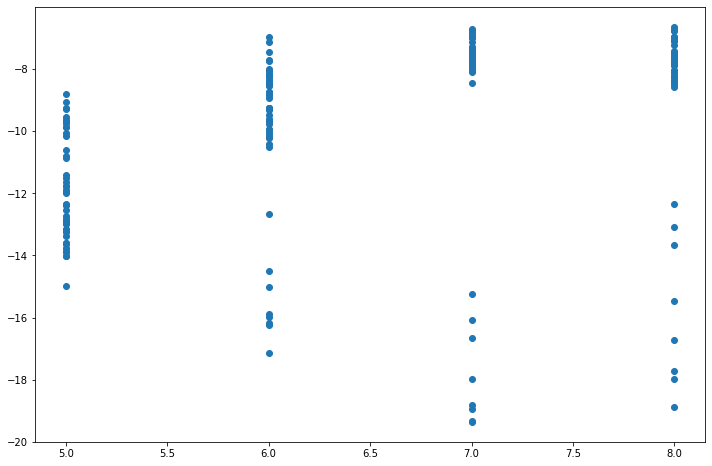

In [30]:
#test the line
y_line = -0.291995 * data["blue"] / 255 + (-0.3806) * data["red"] #+ 0.5973 * data["HLS_S"] + 0.47712 * 255.0
y_line
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(data['label'], y_line)
plt.show()

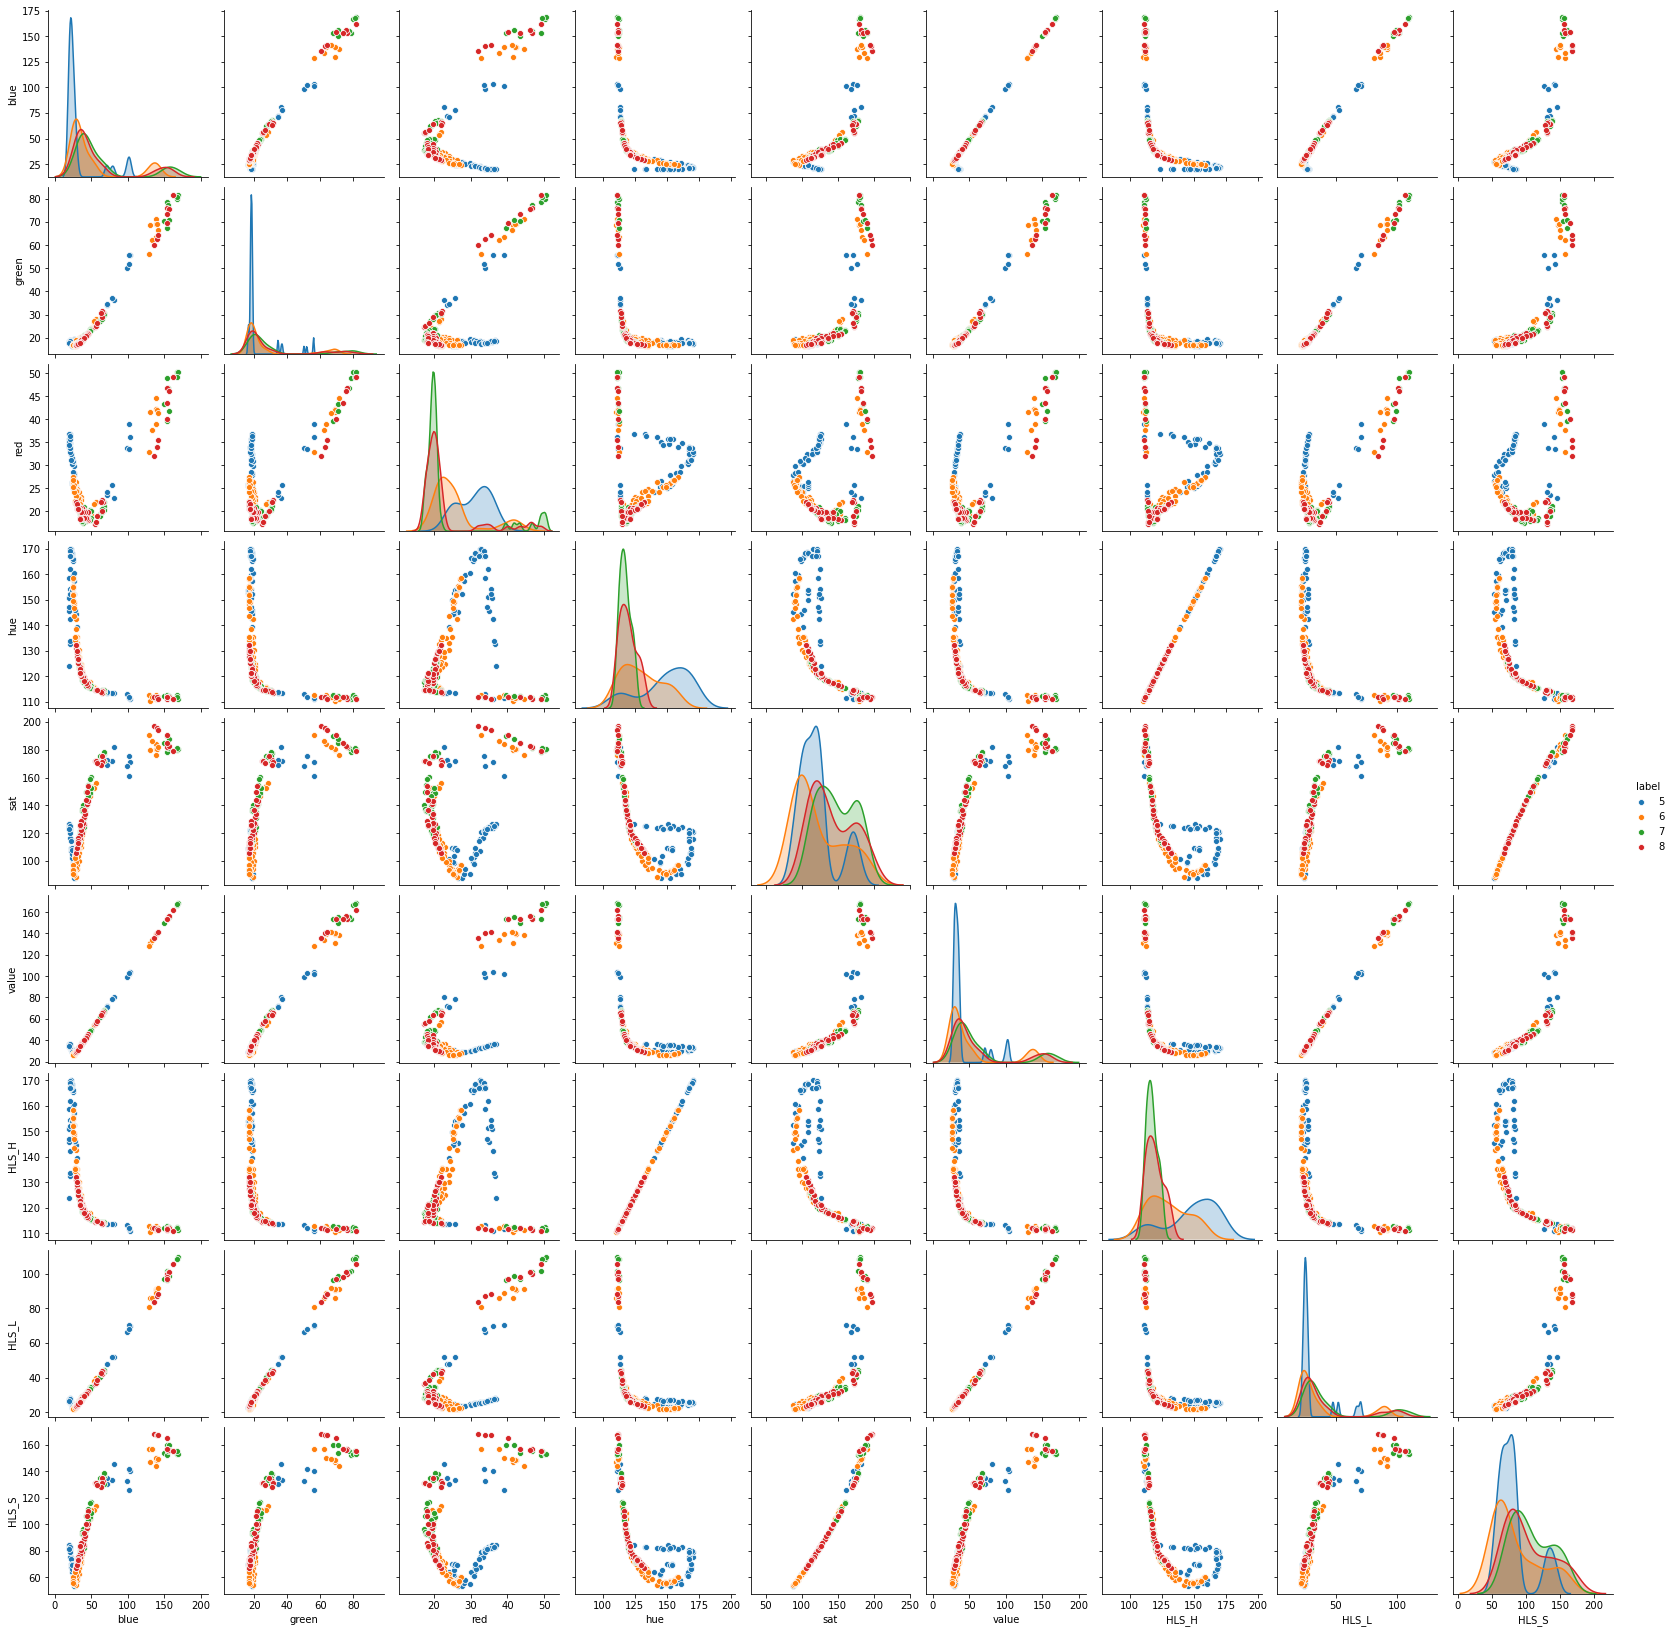

In [31]:

#ax= sns.pairplot(data=data)
ax2 = sns.pairplot(data=data, hue='label')

In [32]:
#对数据进行标准化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

data_XY = data.copy()
y = data_XY.pop('label')
x = data_XY
x

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S
0,28.360215,18.918866,26.644673,145.357771,87.782991,28.898338,145.309873,24.156891,53.220430
1,26.931332,18.678399,27.753968,152.304348,87.787440,28.508282,152.265700,23.840580,53.220497
2,25.657631,18.368183,28.297193,157.259439,90.607938,28.528558,157.216199,23.689577,55.331075
3,24.818455,17.933874,28.464683,159.948302,94.461677,28.509167,159.905020,23.466186,58.225128
4,29.976091,18.376270,24.251943,139.512253,101.415421,30.714286,139.469516,24.710998,63.993724
...,...,...,...,...,...,...,...,...,...
187,30.105223,17.305589,21.565211,130.012523,108.950367,30.130880,129.961668,23.955712,69.612095
188,31.195616,17.392449,20.455168,126.686558,113.173238,31.212209,126.660527,24.534023,72.903334
189,34.403811,17.814428,18.375529,121.237145,126.086358,34.406534,121.210829,26.115094,83.880672
190,58.259576,26.207867,18.857248,114.801856,170.362257,58.288156,114.781379,38.612846,129.493223


In [33]:
data_XY = data_XY / 255.0
data_XY = pd.concat([data_XY, y], axis=1)
data_XY

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S,label
0,0.111217,0.074192,0.104489,0.570030,0.344247,0.113327,0.569843,0.094733,0.208708,5
1,0.105613,0.073249,0.108839,0.597272,0.344264,0.111797,0.597120,0.093492,0.208708,5
2,0.100618,0.072032,0.110969,0.616704,0.355325,0.111877,0.616534,0.092900,0.216985,5
3,0.097327,0.070329,0.111626,0.627248,0.370438,0.111801,0.627079,0.092024,0.228334,5
4,0.117553,0.072064,0.095106,0.547107,0.397708,0.120448,0.546939,0.096906,0.250956,5
...,...,...,...,...,...,...,...,...,...,...
187,0.118060,0.067865,0.084569,0.509853,0.427256,0.118160,0.509654,0.093944,0.272989,8
188,0.122336,0.068206,0.080216,0.496810,0.443817,0.122401,0.496708,0.096212,0.285895,8
189,0.134917,0.069861,0.072061,0.475440,0.494456,0.134928,0.475337,0.102412,0.328944,8
190,0.228469,0.102776,0.073950,0.450203,0.668087,0.228581,0.450123,0.151423,0.507817,8


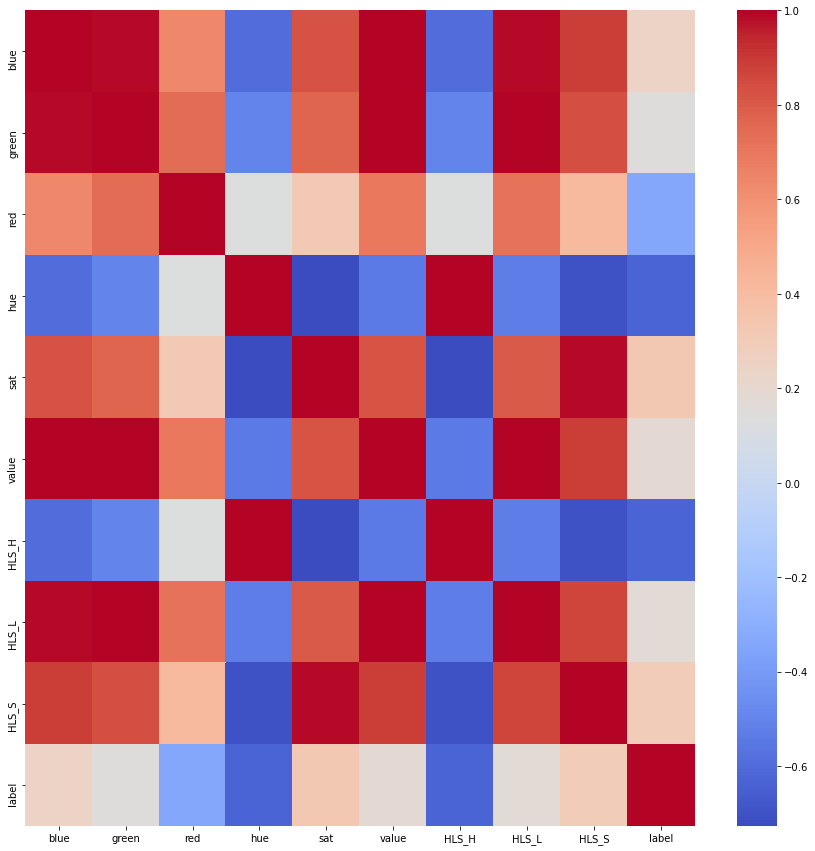

In [34]:
#热力图
plt.figure(figsize=(15,15))
sns.heatmap(data=data_XY.corr(), cmap='coolwarm')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(data_XY,train_size = 0.7, test_size = 0.3, random_state = 0)
train

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S,label
51,0.150211,0.080397,0.081929,0.473436,0.475759,0.150211,0.473310,0.115368,0.312667,6
86,0.101151,0.067269,0.100498,0.585134,0.352771,0.103865,0.584997,0.086492,0.215453,6
143,0.657038,0.316594,0.193363,0.438791,0.709709,0.657211,0.438736,0.425327,0.608982,7
40,0.094279,0.063858,0.101431,0.603737,0.427533,0.112190,0.603522,0.088944,0.273765,5
176,0.122969,0.068053,0.079791,0.495740,0.447539,0.122981,0.495631,0.096442,0.288819,8
...,...,...,...,...,...,...,...,...,...,...
103,0.173551,0.086742,0.077705,0.460038,0.553964,0.173551,0.459998,0.125922,0.383778,7
67,0.111764,0.070326,0.095547,0.543207,0.371313,0.111913,0.542980,0.092073,0.228882,6
117,0.168629,0.082030,0.069545,0.456391,0.586551,0.168629,0.456325,0.119774,0.416076,7
47,0.277899,0.135427,0.094829,0.445915,0.661581,0.278705,0.445808,0.186930,0.512534,5


In [37]:
y_train = train.pop('label')
#columns = ['red', 'hue']
#X_train = train[columns]
X_train = train
X_train

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S
51,0.150211,0.080397,0.081929,0.473436,0.475759,0.150211,0.473310,0.115368,0.312667
86,0.101151,0.067269,0.100498,0.585134,0.352771,0.103865,0.584997,0.086492,0.215453
143,0.657038,0.316594,0.193363,0.438791,0.709709,0.657211,0.438736,0.425327,0.608982
40,0.094279,0.063858,0.101431,0.603737,0.427533,0.112190,0.603522,0.088944,0.273765
176,0.122969,0.068053,0.079791,0.495740,0.447539,0.122981,0.495631,0.096442,0.288819
...,...,...,...,...,...,...,...,...,...
103,0.173551,0.086742,0.077705,0.460038,0.553964,0.173551,0.459998,0.125922,0.383778
67,0.111764,0.070326,0.095547,0.543207,0.371313,0.111913,0.542980,0.092073,0.228882
117,0.168629,0.082030,0.069545,0.456391,0.586551,0.168629,0.456325,0.119774,0.416076
47,0.277899,0.135427,0.094829,0.445915,0.661581,0.278705,0.445808,0.186930,0.512534


In [38]:
y_test = test.pop('label')
X_test = test
X_test

,blue,green,red,hue,sat,value,HLS_H,HLS_L,HLS_S
110,0.167781,0.083958,0.075637,0.460363,0.550653,0.167784,0.460298,0.122256,0.380387
74,0.103562,0.065758,0.095043,0.563140,0.366459,0.103983,0.562928,0.085835,0.225607
163,0.136889,0.073707,0.079376,0.481329,0.465451,0.136900,0.481278,0.105967,0.304131
97,0.191127,0.092951,0.079573,0.456954,0.584160,0.191129,0.456951,0.135307,0.413067
126,0.129286,0.071700,0.080984,0.489377,0.448112,0.129342,0.489305,0.101357,0.289054
71,0.548667,0.270403,0.165112,0.437731,0.706859,0.550149,0.437696,0.357503,0.582894
18,0.089336,0.069889,0.122275,0.660959,0.428195,0.122364,0.660754,0.097107,0.273227
157,0.146072,0.076452,0.077803,0.473021,0.487898,0.146088,0.472872,0.111367,0.323515
145,0.172498,0.085023,0.075951,0.460137,0.560159,0.172520,0.460106,0.124604,0.389609
7,0.095357,0.073189,0.119701,0.648777,0.388197,0.119713,0.648533,0.097420,0.241375


In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
model.score(X_test, y_test)

0.7941128774422735

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model_line = LinearRegression()
model_line.fit(X_train, y_train)
rfe = RFE(model_line, n_features_to_select= 5)             
rfe = rfe.fit(X_train, y_train)
model_line.score(X_test, y_test)

0.5822132628128092

In [48]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('blue', True, 1),
 ('green', False, 3),
 ('red', True, 1),
 ('hue', True, 1),
 ('sat', False, 5),
 ('value', True, 1),
 ('HLS_H', True, 1),
 ('HLS_L', False, 4),
 ('HLS_S', False, 2)]

In [49]:
# Selecting the variables which are in support
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['blue', 'red', 'hue', 'value', 'HLS_H'], dtype='object')

In [50]:
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     14.65
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.95e-16
Time:                        16:46:49   Log-Likelihood:                -153.97
No. Observations:                 134   AIC:                             327.9
Df Residuals:                     124   BIC:                             356.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9936      4.217      3.319      0.0

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfec.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfec.values, i) for i in range(X_train_rfec.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hue,1822101.12
7,HLS_H,1821538.45
8,HLS_L,10053.73
6,value,6782.37
1,blue,5654.95
0,const,3782.74
9,HLS_S,1757.37
5,sat,1366.53
2,green,1074.40
3,red,251.23


In [52]:
intercept = model_line.intercept_ 
coefficients = model_line.coef_ 
print("截距:", intercept) 
print("系数:", coefficients)

截距: 13.993593261576276
系数: [ -24.47654027   -7.33009775  -49.23796451  359.13379323    6.60395791
   54.97965947 -364.28722807  -15.65988276  -18.57950985]
